In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import altair as alt
alt.renderers.enable('notebook') # enable altair rendering

import warnings
warnings.filterwarnings('ignore')

In [70]:
# load the provided data
train = pd.read_csv('Data/train.csv')
train_features = train.drop(['Id','rez_esc','v18q1', 'dependency'], axis = 1)
train_labels = pd.Series(train.values[:, -1], name=train.columns[-1])

In [71]:
# Replace "no" values with 0
train_features['edjefe'] = train_features['edjefe'].replace({'no': 0})
train_features['edjefa'] = train_features['edjefa'].replace({'no': 0})

In [72]:
train_features

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,180000.0,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,180000.0,0,5,0,1,1,1,0,2,2,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,130000.0,1,2,0,1,1,0,0,1,1,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,4
8,130000.0,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,4
9,130000.0,1,2,0,1,1,0,0,1,1,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,4


In [73]:
# Changing multilevels into binary

train_features['Target'] = train_features['Target'].replace({1: 1})
train_features['Target'] = train_features['Target'].replace({2: 1})
train_features['Target'] = train_features['Target'].replace({3: 1})
train_features['Target'] = train_features['Target'].replace({4: 0})
train_features

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,0
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,0
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,0
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,0
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,0
5,180000.0,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,0
6,180000.0,0,5,0,1,1,1,0,2,2,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,0
7,130000.0,1,2,0,1,1,0,0,1,1,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,0
8,130000.0,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,0
9,130000.0,1,2,0,1,1,0,0,1,1,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,0


In [74]:
train_features.Target.value_counts()


0    5996
1    3561
Name: Target, dtype: int64

In [82]:
from pandas import read_csv
from sklearn.preprocessing import Imputer
import numpy
# fill missing values with mean column values
#values = train_features.v2a1
#imputer = Imputer()
#transformed_values = imputer.fit_transform(values)
#count the number of NaN values in each column
#print(numpy.isnan(transformed_values).sum())


#print(numpy.isnan(train_features['v2a1']).sum())

ValueError: Expected 2D array, got 1D array instead:
array=[190000. 135000.     nan ...  80000.  80000.  80000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

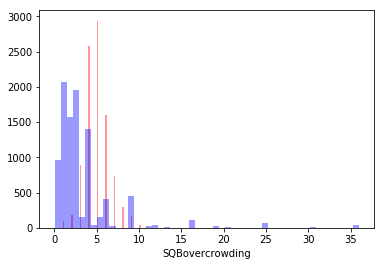

In [43]:
#Exploratory Analysis

sns.distplot(train_features['rooms'],hist=True, kde=False, color = 'red');
sns.distplot(train_features['SQBovercrowding'],hist=True, kde=False, color = 'blue');

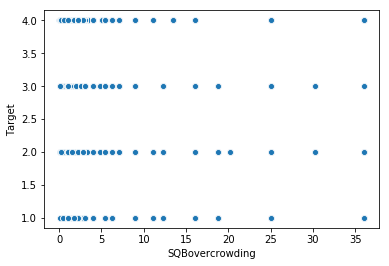

In [45]:
sns.scatterplot(x="SQBovercrowding", y="Target", data=train_features)